In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Load data
results_path = Path('../../../results/all/experiment_results.csv')
df = pd.read_csv(results_path)

# Filter for synthetic datasets and NIMO only
synthetic_datasets = ['A', 'B', 'C', 'D']
df_synthetic = df[df['dataset_id'].isin(synthetic_datasets)]
df_nimo = df_synthetic[df_synthetic['model_name'] == 'nimo']

print(f"Loaded {len(df_nimo)} NIMO synthetic experiments")
print(f"Datasets: {df_nimo['dataset_id'].unique()}")


Loaded 20 NIMO synthetic experiments
Datasets: ['A' 'B' 'C' 'D']


\n================================================================================
NIMO LEARNING DYNAMICS ANALYSIS
\nDataset A - NIMO Learning Dynamics:
  F1 improvement: -0.011
  F1 volatility: 0.007
  Feature stability: 0.9
  Final features selected: 7
  Best iteration features: 8
\nDataset B - NIMO Learning Dynamics:
  F1 improvement: 0.106
  F1 volatility: 0.039
  Feature stability: 1.7
  Final features selected: 10
  Best iteration features: 10
\nDataset C - NIMO Learning Dynamics:
  F1 improvement: 0.020
  F1 volatility: 0.012
  Feature stability: 0.5
  Final features selected: 6
  Best iteration features: 6
\nDataset D - NIMO Learning Dynamics:
  F1 improvement: -0.008
  F1 volatility: 0.027
  Feature stability: 1.4
  Final features selected: 19
  Best iteration features: 18


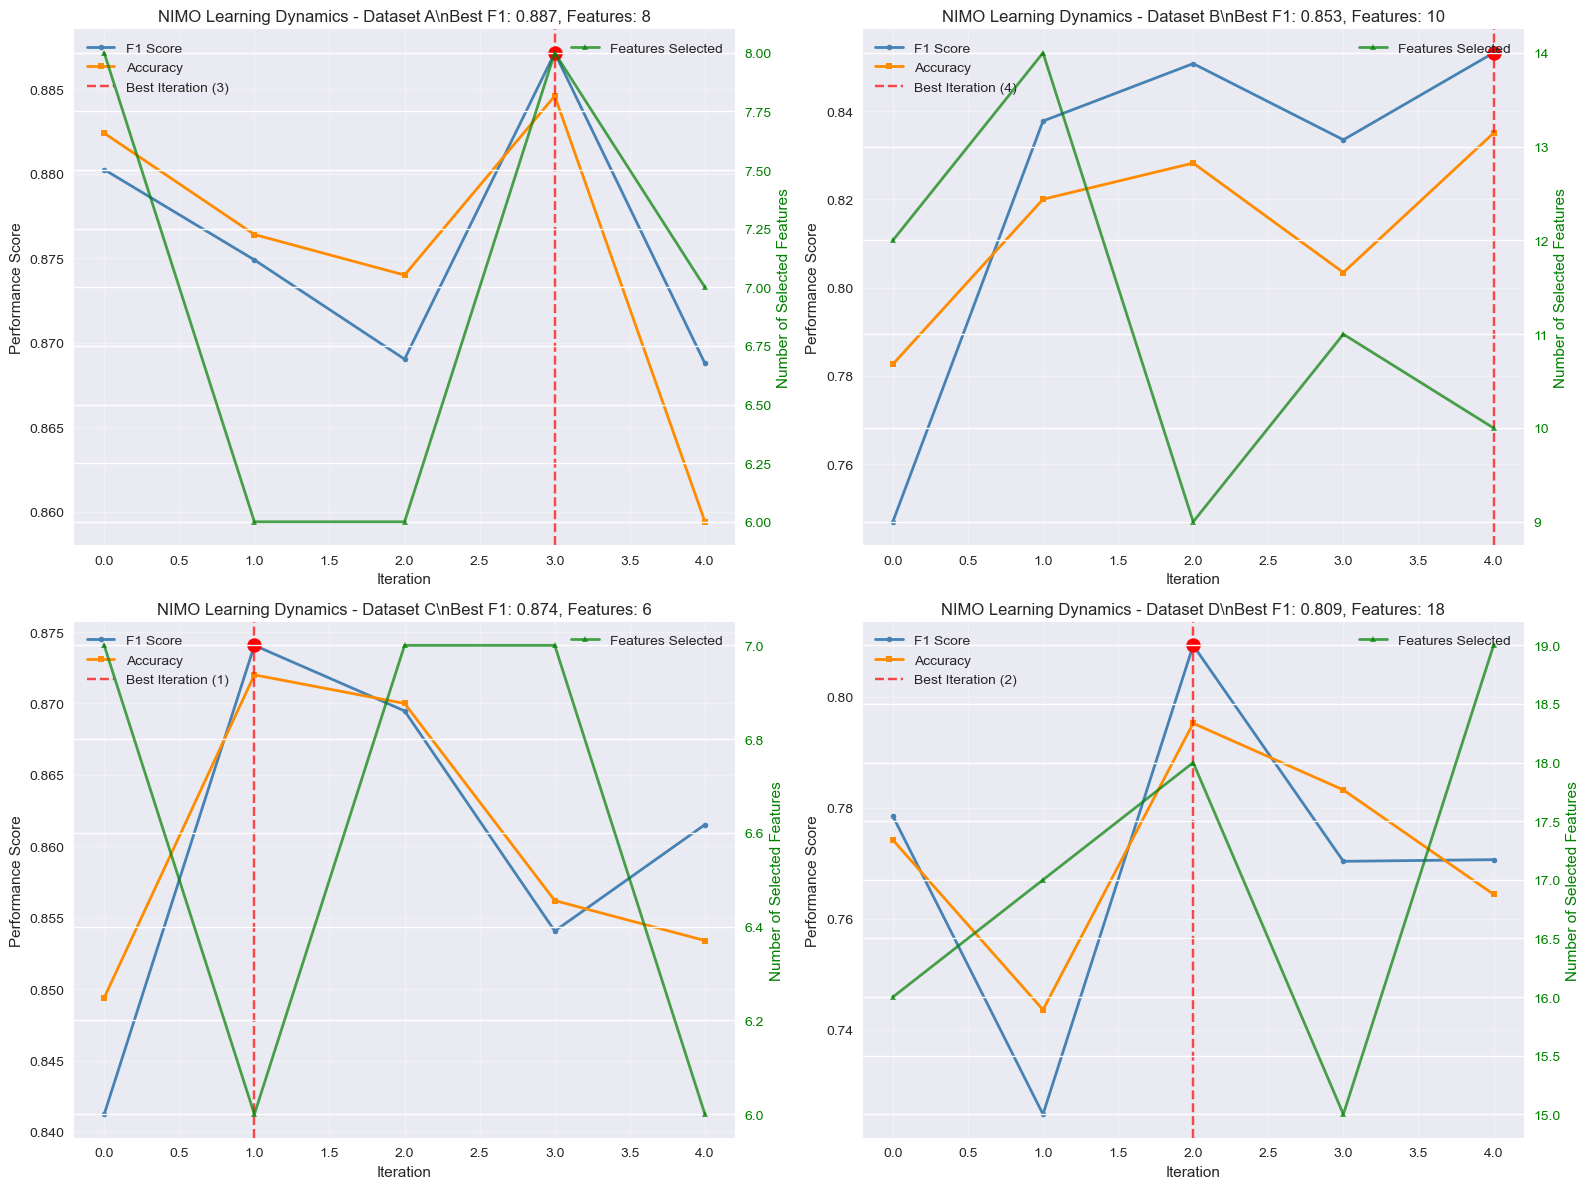

\n================================================================================
INTERPRETATION:
- Blue line = F1 score evolution over iterations
- Orange line = Accuracy evolution over iterations
- Green line = Number of features selected over iterations
- Red line = Best performing iteration
- Shows how NIMO learns and adapts its feature selection


In [40]:
# 3. NIMO Learning Dynamics Analysis
print("\\n" + "=" * 80)
print("NIMO LEARNING DYNAMICS ANALYSIS")
print("=" * 80)

# Create subplots for each dataset
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for i, dataset in enumerate(synthetic_datasets):
    dataset_data = df_nimo[df_nimo['dataset_id'] == dataset]
    
    if len(dataset_data) > 0:
        # Get all iterations for this dataset
        iterations = dataset_data['iteration'].values
        f1_scores = dataset_data['f1'].values
        accuracies = dataset_data['accuracy'].values
        n_selected = dataset_data['n_selected'].values
        
        # Analyze learning dynamics
        ax = axes[i]
        
        # Plot learning curves
        ax.plot(iterations, f1_scores, 'o-', color='steelblue', linewidth=2, markersize=4, label='F1 Score')
        ax.plot(iterations, accuracies, 's-', color='darkorange', linewidth=2, markersize=4, label='Accuracy')
        
        # Add feature selection evolution
        ax2 = ax.twinx()
        ax2.plot(iterations, n_selected, '^-', color='green', linewidth=2, markersize=4, alpha=0.7, label='Features Selected')
        ax2.set_ylabel('Number of Selected Features', color='green')
        ax2.tick_params(axis='y', labelcolor='green')
        
        # Highlight best iteration
        best_idx = f1_scores.argmax()
        ax.axvline(x=iterations[best_idx], color='red', linestyle='--', alpha=0.7, label=f'Best Iteration ({iterations[best_idx]})')
        ax.scatter([iterations[best_idx]], [f1_scores[best_idx]], color='red', s=100, zorder=5)
        
        ax.set_xlabel('Iteration')
        ax.set_ylabel('Performance Score')
        ax.set_title(f'NIMO Learning Dynamics - Dataset {dataset}\\n'
                    f'Best F1: {f1_scores[best_idx]:.3f}, Features: {n_selected[best_idx]}')
        ax.legend(loc='upper left')
        ax2.legend(loc='upper right')
        ax.grid(True, alpha=0.3)
        
        # Calculate learning statistics
        f1_improvement = f1_scores[-1] - f1_scores[0] if len(f1_scores) > 1 else 0
        f1_volatility = np.std(f1_scores)
        feature_stability = np.std(n_selected)
        
        print(f"\\nDataset {dataset} - NIMO Learning Dynamics:")
        print(f"  F1 improvement: {f1_improvement:.3f}")
        print(f"  F1 volatility: {f1_volatility:.3f}")
        print(f"  Feature stability: {feature_stability:.1f}")
        print(f"  Final features selected: {n_selected[-1]}")
        print(f"  Best iteration features: {n_selected[best_idx]}")
        
    else:
        axes[i].text(0.5, 0.5, f'No data for {dataset}', 
                   ha='center', va='center', fontsize=12)
        axes[i].set_title(f'NIMO Learning Dynamics - Dataset {dataset}')
        axes[i].axis('off')

plt.tight_layout()
plt.show()

print("\\n" + "=" * 80)
print("INTERPRETATION:")
print("- Blue line = F1 score evolution over iterations")
print("- Orange line = Accuracy evolution over iterations")
print("- Green line = Number of features selected over iterations")
print("- Red line = Best performing iteration")
print("- Shows how NIMO learns and adapts its feature selection")
print("=" * 80)


\n================================================================================
NIMO NEURAL NETWORK WEIGHT MATRIX ANALYSIS
\nDataset A - Averaged across 5 iterations
  Weight matrix shape: (64, 20)
  True features: [0, 1, 2, 3, 4]
  Sampled top 30 neurons (out of 64)
  Weight matrix analysis:
    Shape: (30, 20)
    Overall sparsity: 0.000
    True features sparsity: 0.000
    Non-true features sparsity: 0.000
    Max weight: 0.173
    Mean weight: 0.046
    Color range: [-0.120, 0.120]
\nDataset B - Averaged across 5 iterations
  Weight matrix shape: (200, 64)
  True features: [0, 1, 2, 3, 4]
  Sampled top 30 neurons (out of 200)
  Weight matrix analysis:
    Shape: (30, 64)
    Overall sparsity: 0.000
    True features sparsity: 0.000
    Non-true features sparsity: 0.000
    Max weight: 0.059
    Mean weight: 0.014
    Color range: [-0.035, 0.035]
\nDataset C - Averaged across 5 iterations
  Weight matrix shape: (64, 20)
  True features: [0, 1, 2, 3, 4]
  Sampled top 30 neurons (

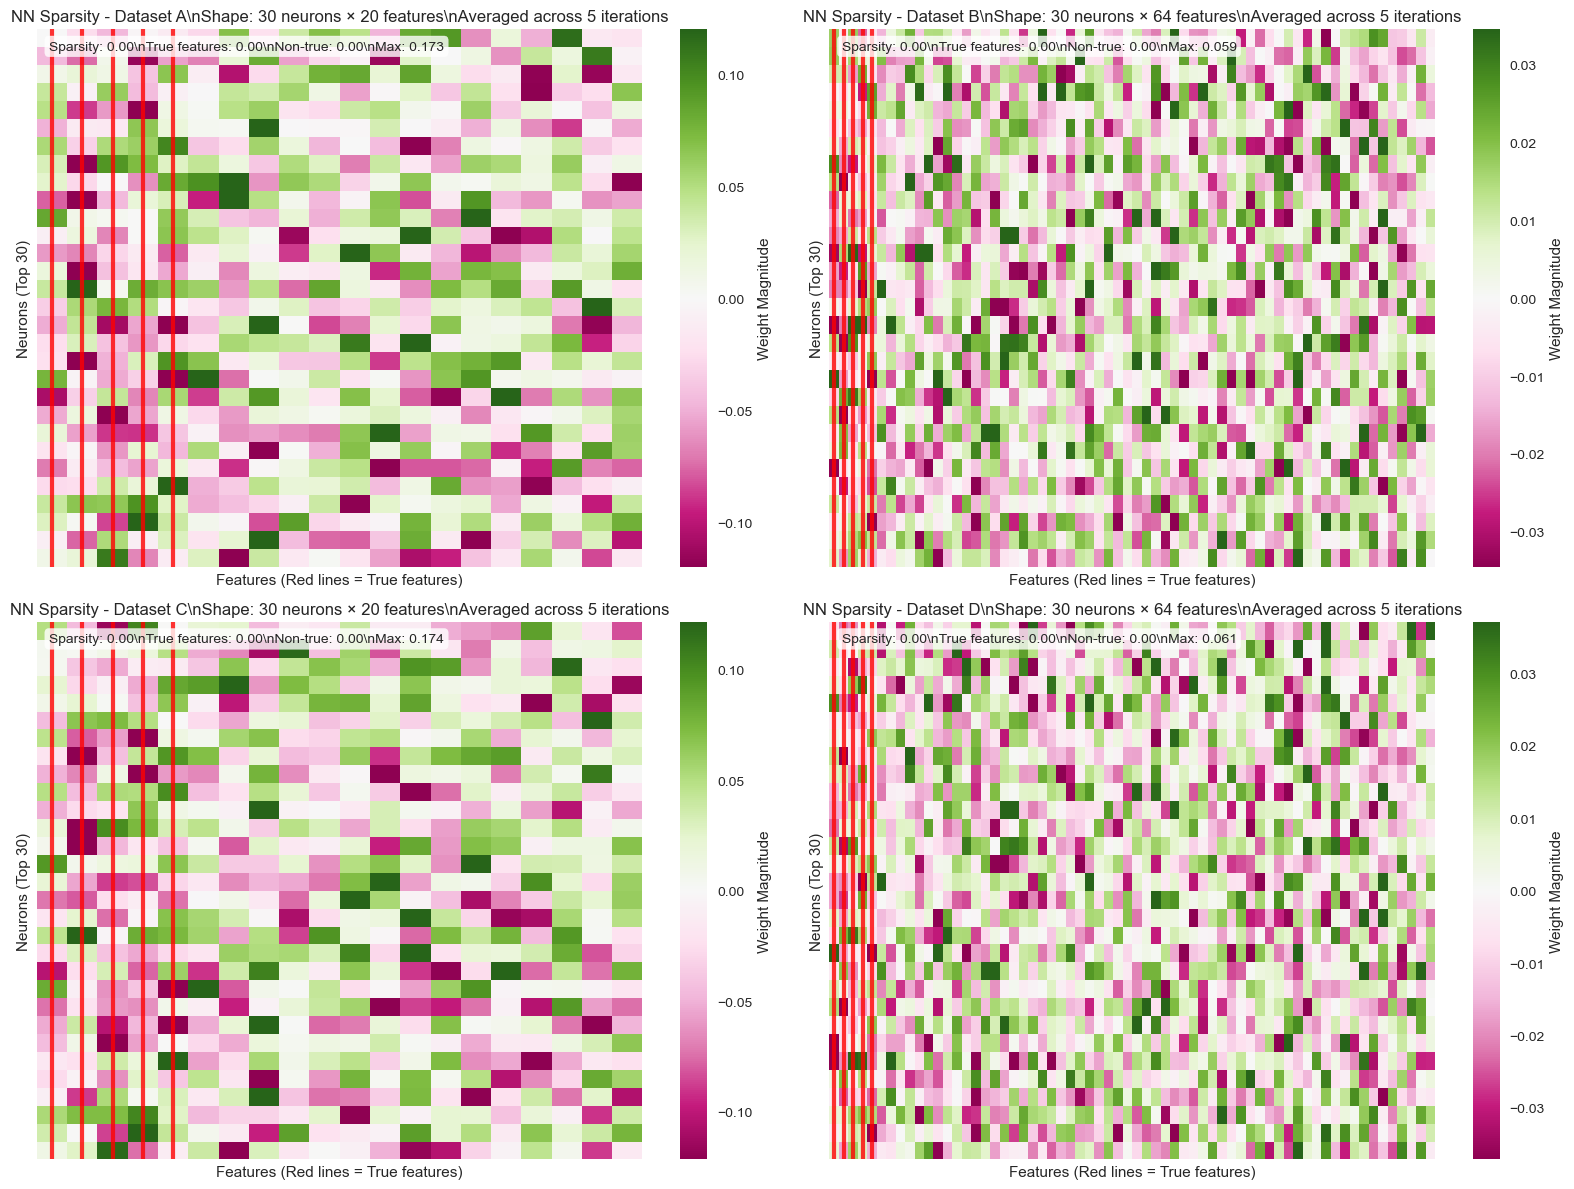

\n================================================================================
IMPROVEMENTS APPLIED:
1. ✅ AVERAGED across ALL iterations (not just best F1) - reduces noise
2. ✅ RED LINES highlight true features (should be active)
3. ✅ Sampled top 30 neurons for clarity
4. ✅ Better color scaling (95th percentile)
5. ✅ Separate sparsity analysis for true vs non-true features
6. ✅ Seaborn heatmap with center=0 for better contrast


In [41]:
# 2. NIMO Neural Network Weight Matrix Analysis (First Layer Sparsity)
print("\\n" + "=" * 80)
print("NIMO NEURAL NETWORK WEIGHT MATRIX ANALYSIS")
print("=" * 80)

# Create subplots for each dataset
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for i, dataset in enumerate(synthetic_datasets):
    dataset_data = df_nimo[df_nimo['dataset_id'] == dataset]
    
    if len(dataset_data) > 0:
        try:
            # IMPROVEMENT 1: Average across ALL iterations (not just best F1)
            all_weight_matrices = []
            for _, row in dataset_data.iterrows():
                coefs_dict = json.loads(row['coefficients'])
                first_layer_weights = coefs_dict.get('first_layer_weights', [])
                if first_layer_weights and len(first_layer_weights) > 0:
                    weight_matrix = np.array(first_layer_weights)
                    # Transpose to get [neurons, features]
                    if weight_matrix.shape[0] < weight_matrix.shape[1]:
                        weight_matrix = weight_matrix.T
                    all_weight_matrices.append(weight_matrix)
            
            if all_weight_matrices:
                # Average across iterations to reduce noise
                avg_weight_matrix = np.mean(all_weight_matrices, axis=0)
                print(f"\\nDataset {dataset} - Averaged across {len(all_weight_matrices)} iterations")
                print(f"  Weight matrix shape: {avg_weight_matrix.shape}")
                
                # Get true features for highlighting
                true_support = json.loads(dataset_data.iloc[0]['true_support'])
                true_features = set(true_support)
                print(f"  True features: {sorted(true_features)}")
                
                # IMPROVEMENT 2: Sample only first 30 neurons for clarity
                max_neurons = 30
                if avg_weight_matrix.shape[0] > max_neurons:
                    # Sort neurons by their maximum weight magnitude for better visualization
                    neuron_strength = np.max(np.abs(avg_weight_matrix), axis=1)
                    top_neuron_indices = np.argsort(neuron_strength)[-max_neurons:]
                    avg_weight_matrix = avg_weight_matrix[top_neuron_indices]
                    print(f"  Sampled top {max_neurons} neurons (out of {len(neuron_strength)})")
                
                # IMPROVEMENT 3: Better color scaling (ignore outliers)
                abs_weights = np.abs(avg_weight_matrix)
                vmax = np.percentile(abs_weights, 95)  # Use 95th percentile instead of max
                vmin = -vmax
                
                # IMPROVEMENT 4: Use seaborn heatmap for better styling
                ax = axes[i]
                
                # Create heatmap with better contrast
                im = sns.heatmap(avg_weight_matrix, 
                               cmap='PiYG', 
                               center=0, 
                               vmin=vmin, 
                               vmax=vmax,
                               ax=ax,
                               cbar_kws={'label': 'Weight Magnitude'},
                               xticklabels=False,  # Too many features for labels
                               yticklabels=False)  # Too many neurons for labels
                
                # IMPROVEMENT 5: Highlight true features with vertical lines
                for true_feat in true_features:
                    if true_feat < avg_weight_matrix.shape[1]:
                        ax.axvline(x=true_feat + 0.5, color='red', linewidth=3, alpha=0.8)
                
                # Set labels
                ax.set_xlabel('Features (Red lines = True features)')
                ax.set_ylabel('Neurons (Top 30)')
                ax.set_title(f'NN Sparsity - Dataset {dataset}\\n'
                            f'Shape: {avg_weight_matrix.shape[0]} neurons × {avg_weight_matrix.shape[1]} features\\n'
                            f'Averaged across {len(all_weight_matrices)} iterations')
                
                # Calculate and display sparsity statistics
                sparsity = np.mean(abs_weights < 1e-6)
                max_weight = np.max(abs_weights)
                mean_weight = np.mean(abs_weights)
                
                # Calculate sparsity for true vs non-true features
                true_feature_weights = avg_weight_matrix[:, list(true_features)]
                non_true_mask = np.ones(avg_weight_matrix.shape[1], dtype=bool)
                non_true_mask[list(true_features)] = False
                non_true_feature_weights = avg_weight_matrix[:, non_true_mask]
                
                true_sparsity = np.mean(np.abs(true_feature_weights) < 1e-6) if len(true_features) > 0 else 0
                non_true_sparsity = np.mean(np.abs(non_true_feature_weights) < 1e-6) if np.any(non_true_mask) else 0
                
                # Add text box with statistics
                stats_text = f'Sparsity: {sparsity:.2f}\\nTrue features: {true_sparsity:.2f}\\nNon-true: {non_true_sparsity:.2f}\\nMax: {max_weight:.3f}'
                ax.text(0.02, 0.98, stats_text, transform=ax.transAxes, 
                       verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
                
                print(f"  Weight matrix analysis:")
                print(f"    Shape: {avg_weight_matrix.shape}")
                print(f"    Overall sparsity: {sparsity:.3f}")
                print(f"    True features sparsity: {true_sparsity:.3f}")
                print(f"    Non-true features sparsity: {non_true_sparsity:.3f}")
                print(f"    Max weight: {max_weight:.3f}")
                print(f"    Mean weight: {mean_weight:.3f}")
                print(f"    Color range: [{vmin:.3f}, {vmax:.3f}]")
                
            else:
                axes[i].text(0.5, 0.5, f'No neural network weights\\nfor {dataset}', 
                           ha='center', va='center', fontsize=12)
                axes[i].set_title(f'NIMO Weight Analysis - Dataset {dataset}')
                axes[i].axis('off')
                
        except Exception as e:
            axes[i].text(0.5, 0.5, f'Error loading weights\\nfor {dataset}: {str(e)[:50]}...', 
                       ha='center', va='center', fontsize=10)
            axes[i].set_title(f'NIMO Weight Analysis - Dataset {dataset}')
            axes[i].axis('off')
    else:
        axes[i].text(0.5, 0.5, f'No data for {dataset}', 
                   ha='center', va='center', fontsize=12)
        axes[i].set_title(f'NIMO Weight Analysis - Dataset {dataset}')
        axes[i].axis('off')

plt.tight_layout()
plt.show()

print("\\n" + "=" * 80)
print("IMPROVEMENTS APPLIED:")
print("1. ✅ AVERAGED across ALL iterations (not just best F1) - reduces noise")
print("2. ✅ RED LINES highlight true features (should be active)")
print("3. ✅ Sampled top 30 neurons for clarity")
print("4. ✅ Better color scaling (95th percentile)")
print("5. ✅ Separate sparsity analysis for true vs non-true features")
print("6. ✅ Seaborn heatmap with center=0 for better contrast")
print("=" * 80)


\n================================================================================
NIMO FEATURE SELECTION ANALYSIS
\nDataset A - NIMO Feature Selection:
  Selected features: 8
  True features: 5
  Precision: 0.625
  Recall: 1.000
  F1 score: 0.769
  Overlap: 5
\nDataset B - NIMO Feature Selection:
  Selected features: 10
  True features: 5
  Precision: 0.500
  Recall: 1.000
  F1 score: 0.667
  Overlap: 5
\nDataset C - NIMO Feature Selection:
  Selected features: 6
  True features: 5
  Precision: 0.833
  Recall: 1.000
  F1 score: 0.909
  Overlap: 5
\nDataset D - NIMO Feature Selection:
  Selected features: 18
  True features: 5
  Precision: 0.278
  Recall: 1.000
  F1 score: 0.435
  Overlap: 5


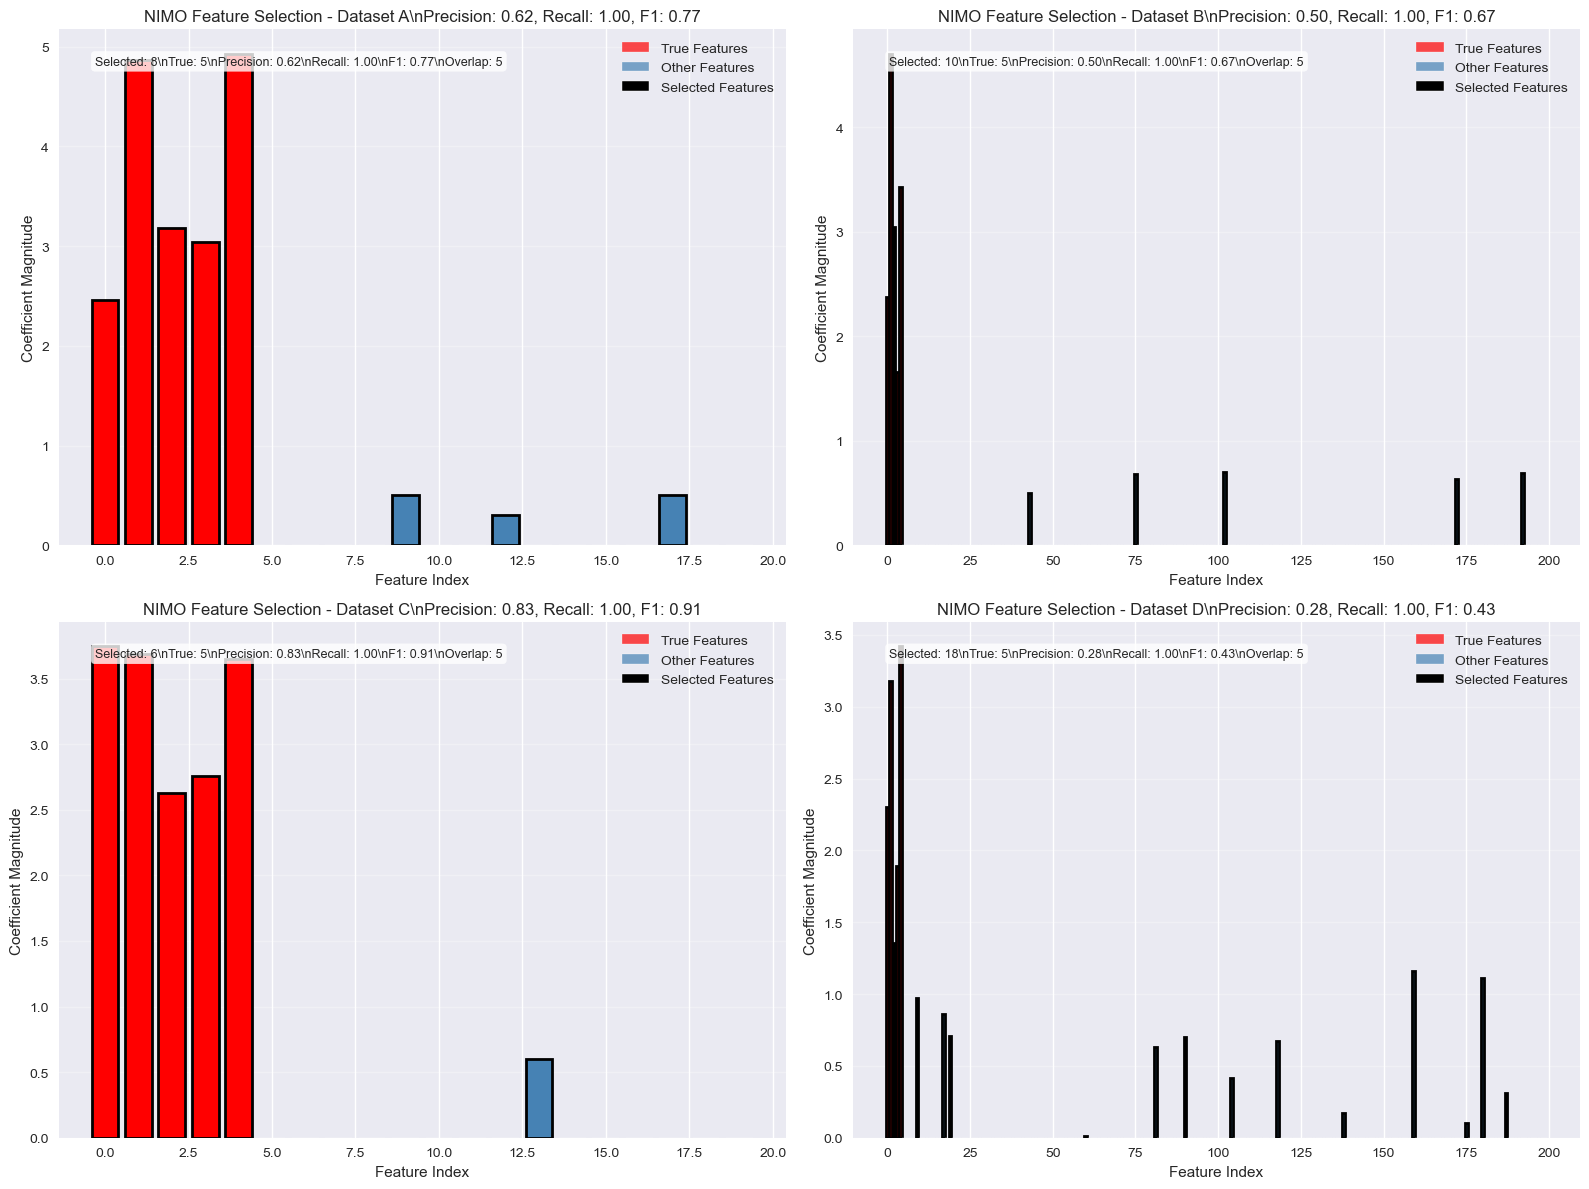

\n================================================================================
NIMO FEATURE SELECTION INTERPRETATION:
- Red bars = True features (should be selected)
- Blue bars = Other features
- Black edges = Actually selected by NIMO
- Precision = Selected true features / All selected features
- Recall = Selected true features / All true features


In [37]:
# 4. NIMO Feature Selection Analysis
print("\\n" + "=" * 80)
print("NIMO FEATURE SELECTION ANALYSIS")
print("=" * 80)

# This plot analyzes NIMO's feature selection behavior
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for i, dataset in enumerate(synthetic_datasets):
    dataset_data = df_nimo[df_nimo['dataset_id'] == dataset]
    
    if len(dataset_data) > 0:
        # Get the best iteration for this dataset
        best_iter = dataset_data.loc[dataset_data['f1'].idxmax()]
        
        try:
            coefs_dict = json.loads(best_iter['coefficients'])
            learned_coefs = coefs_dict.get('values', [])
            
            if learned_coefs and len(learned_coefs) > 0:
                # Get ground truth for comparison
                beta_true_raw = json.loads(best_iter['beta_true'])
                true_support = json.loads(best_iter['true_support'])
                
                # Analyze feature selection
                coefs_array = np.array(learned_coefs)
                coefs_abs = np.abs(coefs_array)
                
                # Find selected features (non-zero coefficients)
                selected_features = np.where(coefs_abs > 1e-6)[0]
                true_features = set(true_support)
                selected_set = set(selected_features)
                
                # Calculate selection metrics
                precision = len(selected_set & true_features) / len(selected_set) if len(selected_set) > 0 else 0
                recall = len(selected_set & true_features) / len(true_features) if len(true_features) > 0 else 0
                f1_selection = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0
                
                # Create feature selection analysis plot
                ax = axes[i]
                
                # Plot coefficient magnitudes for all features
                feature_indices = np.arange(len(coefs_array))
                colors = ['red' if idx in true_features else 'steelblue' for idx in feature_indices]
                
                bars = ax.bar(feature_indices, coefs_abs, color=colors, alpha=0.7)
                
                # Highlight selected features
                for idx in selected_features:
                    bars[idx].set_alpha(1.0)
                    bars[idx].set_edgecolor('black')
                    bars[idx].set_linewidth(2)
                
                ax.set_xlabel('Feature Index')
                ax.set_ylabel('Coefficient Magnitude')
                ax.set_title(f'NIMO Feature Selection - Dataset {dataset}\\n'
                            f'Precision: {precision:.2f}, Recall: {recall:.2f}, F1: {f1_selection:.2f}')
                ax.grid(True, alpha=0.3, axis='y')
                
                # Add legend
                from matplotlib.patches import Patch
                legend_elements = [Patch(facecolor='red', alpha=0.7, label='True Features'),
                                 Patch(facecolor='steelblue', alpha=0.7, label='Other Features'),
                                 Patch(facecolor='black', alpha=1.0, label='Selected Features')]
                ax.legend(handles=legend_elements, loc='upper right')
                
                # Add detailed analysis
                ax.text(0.05, 0.95, f'Selected: {len(selected_features)}\\n'
                                    f'True: {len(true_features)}\\n'
                                    f'Precision: {precision:.2f}\\n'
                                    f'Recall: {recall:.2f}\\n'
                                    f'F1: {f1_selection:.2f}\\n'
                                    f'Overlap: {len(selected_set & true_features)}', 
                       transform=ax.transAxes, fontsize=9,
                       bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8),
                       verticalalignment='top')
                
                print(f"\\nDataset {dataset} - NIMO Feature Selection:")
                print(f"  Selected features: {len(selected_features)}")
                print(f"  True features: {len(true_features)}")
                print(f"  Precision: {precision:.3f}")
                print(f"  Recall: {recall:.3f}")
                print(f"  F1 score: {f1_selection:.3f}")
                print(f"  Overlap: {len(selected_set & true_features)}")
                
            else:
                axes[i].text(0.5, 0.5, f'No coefficient data\\nfor {dataset}', 
                           ha='center', va='center', fontsize=12)
                axes[i].set_title(f'NIMO Feature Selection - Dataset {dataset}')
                axes[i].axis('off')
                
        except Exception as e:
            axes[i].text(0.5, 0.5, f'Error in feature analysis\\n{dataset}: {str(e)[:30]}...', 
                       ha='center', va='center', fontsize=10)
            axes[i].set_title(f'NIMO Feature Selection - Dataset {dataset}')
            axes[i].axis('off')
    else:
        axes[i].text(0.5, 0.5, f'No data for {dataset}', 
                   ha='center', va='center', fontsize=12)
        axes[i].set_title(f'NIMO Feature Selection - Dataset {dataset}')
        axes[i].axis('off')

plt.tight_layout()
plt.show()

print("\\n" + "=" * 80)
print("NIMO FEATURE SELECTION INTERPRETATION:")
print("- Red bars = True features (should be selected)")
print("- Blue bars = Other features")
print("- Black edges = Actually selected by NIMO")
print("- Precision = Selected true features / All selected features")
print("- Recall = Selected true features / All true features")
print("=" * 80)
